# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [9]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
## 동일 경로에 train.csv 가 있다면:
## 데이터 불러오기

titanic_df = pd.read_csv("./train.csv")

## 1. 분석의 목적과 변수 확인
- 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

In [12]:
## 상위 5개 데이터 확인하기

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
## 각 Column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [14]:
## 데이터 전체 정보를 얻는 함수 : .describe()

titanic_df.describe() # 수치형 데이터에 대한 요약만을 제공!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
## 상관계수 확인!

titanic_df.corr()
# Correlation(상관성) is Not Causation(인과성)

# 상관성 : A 가 커지면, B도 커진다.
# 인과성 : A 로 부터 B가 발생하는 종속관계가 나타난다.

C:\Users\hamin\AppData\Local\Temp\ipykernel_25728\1015491229.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [19]:
## 결측치 확인

titanic_df.isnull().sum()

# Age, Cabin, Embarked 에서 결측치 발견!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### 1. Survived Column

In [22]:
## 생존자, 사명자 명수는?

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

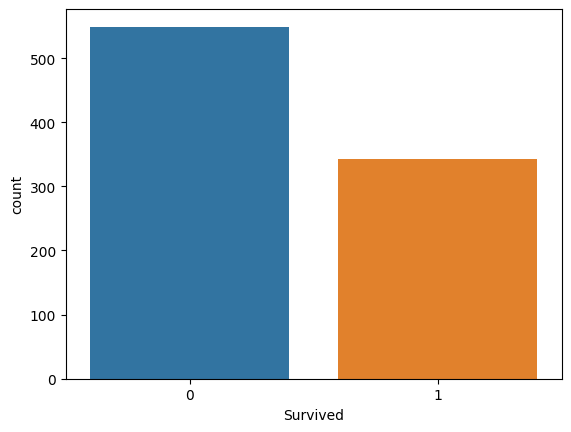

In [23]:
## 생존자수와 사망자수를 Barplot으로 그려보기 sns.countplot()

sns.countplot(x='Survived', data=titanic_df)
plt.show()

### 2. Pclass

In [28]:
## Pclass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [29]:
# 생존자 인원?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [30]:
# 생존 비율?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


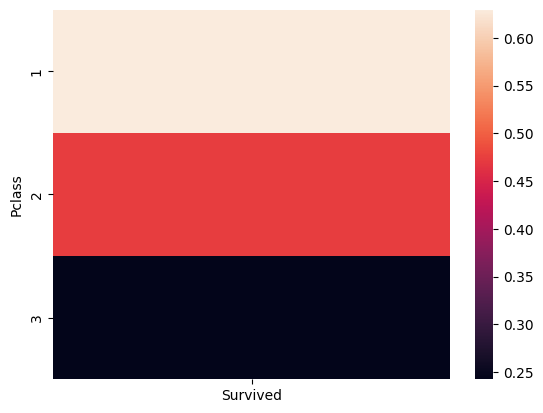

In [31]:
# 히트맵 활용

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.show()

### 3. Sex

In [35]:
titanic_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

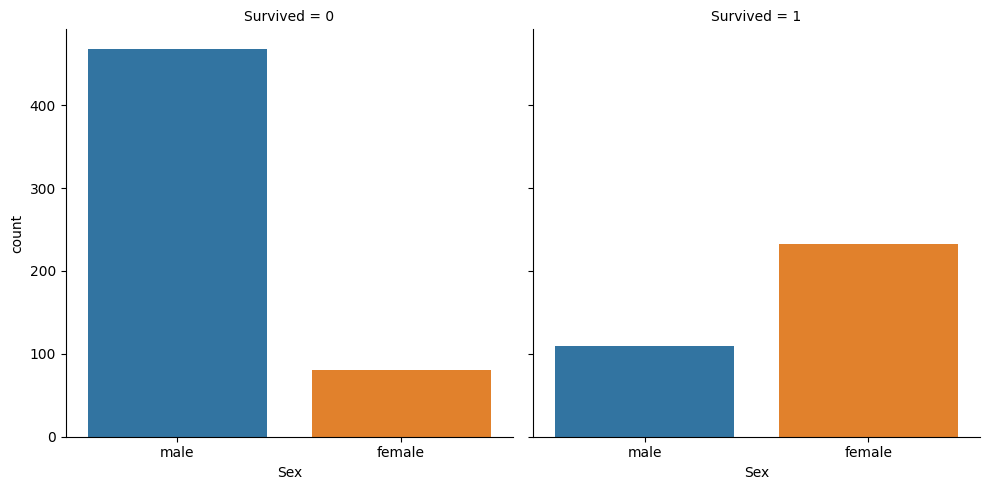

In [37]:
# sns.catplot

sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_df)
plt.show()

### 4. Age
Remind: 결측치 존재!

In [39]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

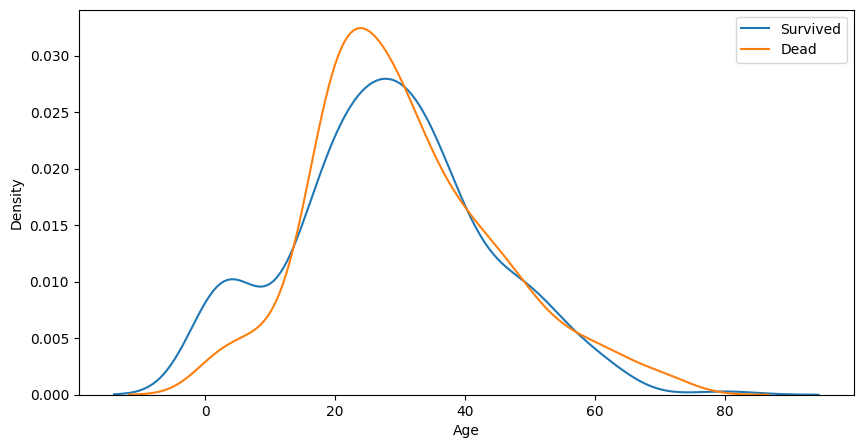

In [42]:
## Survived 1, 0과 Age의 경향성

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])

plt.show()

### Appendix 1. Sex + Pclass vs Survived

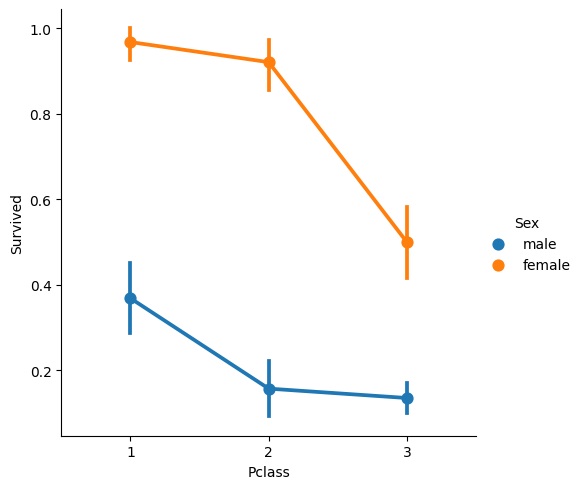

In [43]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='point', data=titanic_df)
plt.show()

### Appendix 2. Age + Pclass

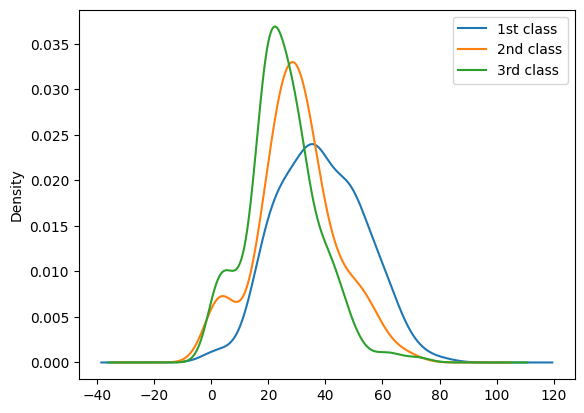

In [46]:
## Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()